# <font color=grey>MNIST TEST</font>


### 1- Imports

In [137]:

from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import sys, os
from importlib import reload
import matplotlib.image as mpimg
import math
sys.path.append('..')








### 2- Load Dataset

In [138]:

# LOAD DATASET

(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

# here we reshape the images to have pixel height, pixel width AND the amount of color layers.
#in this case the 1 means there is only one channel of colors wich is greyscale.
#if if was a rgb pic we would have a 3 instead of 1.
x_train = x_train.reshape(-1, 28, 28, 1) 
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)




x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test :  (10000, 28, 28, 1)
y_test :  (10000,)


### 3- Preparing the data

In [139]:
print('Before normalization : min={}, max={}'.format(x_train.min(), x_train.max()))

xmax = x_train.max()
x_train = x_train / xmax
x_test = x_test / xmax

print('After normalisation : min={}, max={}'.format(x_train.min(), x_train.max()))


Before normalization : min=0, max=255
After normalisation : min=0.0, max=1.0


### 4- Check the data

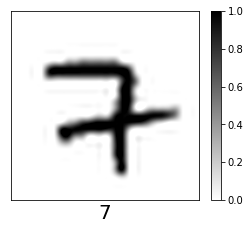

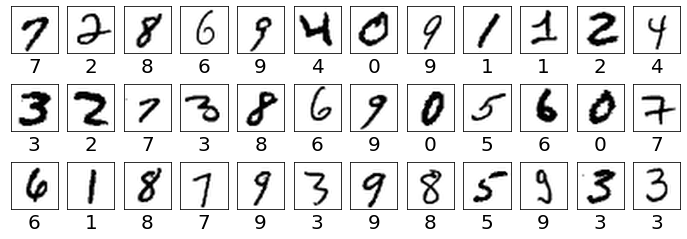

In [140]:
def plot_images(x,y=None, indices='all', columns=12, x_size=1, y_size=1,
                colorbar=False, y_pred=None, cm='binary', norm=None, y_padding=0.35, spines_alpha=1,
                fontsize=20, interpolation='lanczos', save_as='auto'):
    """
    Show some images in a grid, with legends
    args:
        x             : images - Shapes must be (-1,lx,ly) (-1,lx,ly,1) or (-1,lx,ly,3)
        y             : real classes or labels or None (None)
        indices       : indices of images to show or 'all' for all ('all')
        columns       : number of columns (12)
        x_size,y_size : figure size (1), (1)
        colorbar      : show colorbar (False)
        y_pred        : predicted classes (None)
        cm            : Matplotlib color map (binary)
        norm          : Matplotlib imshow normalization (None)
        y_padding     : Padding / rows (0.35)
        spines_alpha  : Spines alpha (1.)
        font_size     : Font size in px (20)
        save_as       : Filename to use if save figs is enable ('auto')
    returns: 
        nothing
    """
    if indices=='all': indices=range(len(x))
    if norm and len(norm) == 2: norm = matplotlib.colors.Normalize(vmin=norm[0], vmax=norm[1])
    draw_labels = (y is not None)
    draw_pred   = (y_pred is not None)
    rows        = math.ceil(len(indices)/columns)
    fig=plt.figure(figsize=(columns*x_size, rows*(y_size+y_padding)))
    n=1
    for i in indices:
        axs=fig.add_subplot(rows, columns, n)
        n+=1
        # ---- Shape is (lx,ly)
        if len(x[i].shape)==2:
            xx=x[i]
        # ---- Shape is (lx,ly,n)
        if len(x[i].shape)==3:
            (lx,ly,lz)=x[i].shape
            if lz==1: 
                xx=x[i].reshape(lx,ly)
            else:
                xx=x[i]
        img=axs.imshow(xx,   cmap = cm, norm=norm, interpolation=interpolation)
#         img=axs.imshow(xx,   cmap = cm, interpolation=interpolation)
        axs.spines['right'].set_visible(True)
        axs.spines['left'].set_visible(True)
        axs.spines['top'].set_visible(True)
        axs.spines['bottom'].set_visible(True)
        axs.spines['right'].set_alpha(spines_alpha)
        axs.spines['left'].set_alpha(spines_alpha)
        axs.spines['top'].set_alpha(spines_alpha)
        axs.spines['bottom'].set_alpha(spines_alpha)
        axs.set_yticks([])
        axs.set_xticks([])
        if draw_labels and not draw_pred:
            axs.set_xlabel(y[i],fontsize=fontsize)
        if draw_labels and draw_pred:
            if y[i]!=y_pred[i]:
                axs.set_xlabel(f'{y_pred[i]} ({y[i]})',fontsize=fontsize)
                axs.xaxis.label.set_color('red')
            else:
                axs.set_xlabel(y[i],fontsize=fontsize)
        if colorbar:
            fig.colorbar(img,orientation="vertical", shrink=0.65)
    #save_fig(save_as)
    plt.show()




plot_images(x_train, y_train, [38], x_size=5, y_size=5, colorbar=True)
plot_images(x_train, y_train, range(15,51), columns=12)



### 5- Model

We have 2 sets of convo layers with an incrementing amount of layers. Both have a 3 by 3 kernell and default padding/stride. the inittially random conv's kernel vals cyclically update such as the weights of a neuron.
Followed by max poolings of 2 by 2 and default padding and stride.
then we do dropouts of 0.2 (20%) in order to temporarely disactivate some neurones and set their output vals to zero wich will reinforce learning on the remaining activated neurones.
Then we flatten in order to have a 1D array.
We then proceed to our first dense neuron layer of our neural network.
Finally the last layer of 10 neurons (because 10 possible numbers as output / targets).
the softmax activation func will give as output the number with highest probability/accuracy

In [134]:
hidden1 = 100
hidden2 = 100

model = keras.models.Sequential()

#first layer of neurons
model.add(keras.layers.Input((28,28,1)))

#first convolution layer
model.add(keras.layers.Conv2D(8,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

#second convolution layer
model.add(keras.layers.Conv2D(16,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

#first hidden layer of 100 neurones
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


# EXAMPLE CALC PARAMS : 
# for first conv layer : (3x3 +1)*8  --> (kernell+bias)*layers
# for last dense layer : 10*(100+1) --> outputs*(inputs+1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)              

### 6- Train the model



In [135]:
batch_size = 512
epochs = 16

history = model.fit(x_train, y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 11s 91ms/step - loss: 1.6920 - accuracy: 0.4428 - val_loss: 0.2616 - val_accuracy: 0.9296
Epoch 2/16
118/118 [==============================] - 11s 96ms/step - loss: 0.4038 - accuracy: 0.8752 - val_loss: 0.1383 - val_accuracy: 0.9618
Epoch 3/16
118/118 [==============================] - 13s 112ms/step - loss: 0.2631 - accuracy: 0.9192 - val_loss: 0.1018 - val_accuracy: 0.9691
Epoch 4/16
118/118 [==============================] - 15s 124ms/step - loss: 0.2126 - accuracy: 0.9357 - val_loss: 0.0832 - val_accuracy: 0.9737
Epoch 5/16
118/118 [==============================] - 13s 107ms/step - loss: 0.1823 - accuracy: 0.9453 - val_loss: 0.0708 - val_accuracy: 0.9786
Epoch 6/16
118/118 [==============================] - 10s 85ms/step - loss: 0.1603 - accuracy: 0.9513 - val_loss: 0.0628 - val_accuracy: 0.9804
Epoch 7/16
118/118 [==============================] - 9s 79ms/step - loss: 0.1535 - accuracy: 0.9530 - val_loss: 0.0578 - val_accurac

### 7- Evaluate




In [114]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss      : {score[0]:4.4f}')
print(f'Test accuracy  : {score[1]:4.4f}')


Test loss      : 0.0536
Test accuracy  : 0.9829


### 8- Plot History

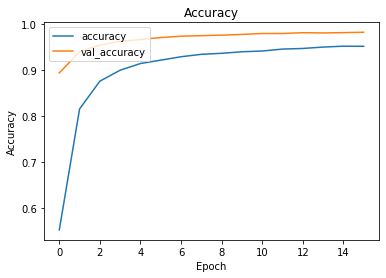

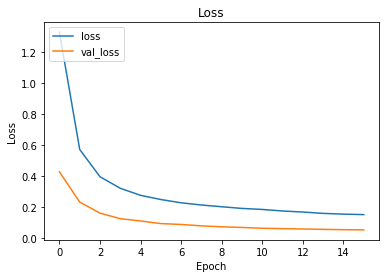

In [115]:
def plot_history(history, figsize=(6,4), 
                 plot={"Accuracy":['accuracy','val_accuracy'], 'Loss':['loss', 'val_loss']},
                 save_as='auto'):
    """
    Show history
    args:
        history: history
        figsize: fig size
        plot: list of data to plot : {<title>:[<metrics>,...], ...}
    """
    fig_id=0
    for title,curves in plot.items():
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.ylabel(title)
        plt.xlabel('Epoch')
        for c in curves:
            plt.plot(history.history[c])
        plt.legend(curves, loc='upper left')
        """if save_as=='auto':
            figname='auto'
        else:
            figname=f'{save_as}_{fig_id}'
            fig_id+=1
        save_fig(figname)"""
        plt.show()

plot_history(history, figsize=(6,4))

### 9- Plot Results

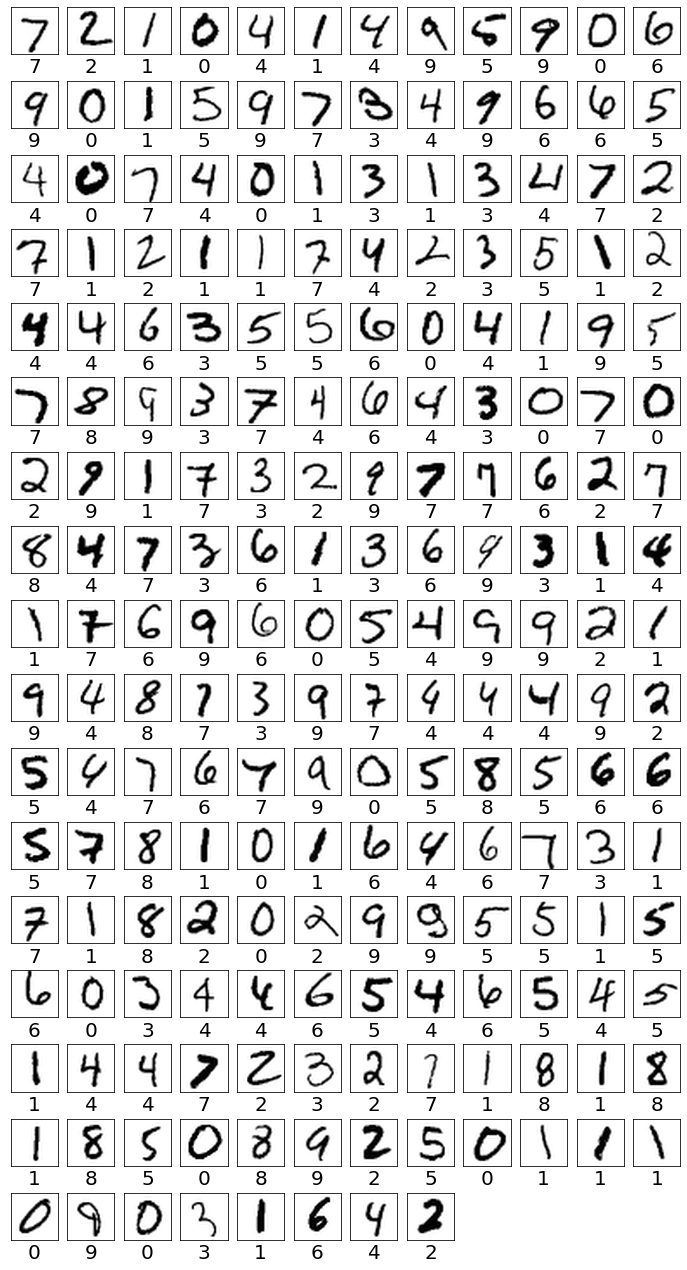

In [118]:
y_sigmoid = model.predict(x_test)
y_pred = np.argmax(y_sigmoid, axis=-1)

plot_images(x_test, y_test, range(0,200), 
            columns=12, x_size=1, y_size=1, y_pred=y_pred)

### 10- Plot some errors

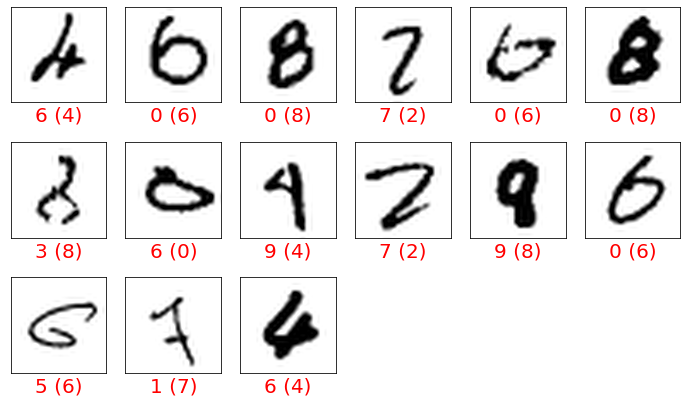

In [119]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i]]
errors=errors[:min(24, len(errors))]
plot_images(x_test, y_test, errors[:15], 
            columns=6, x_size=2, y_size=2, y_pred=y_pred)

### 11- Confusion matrix

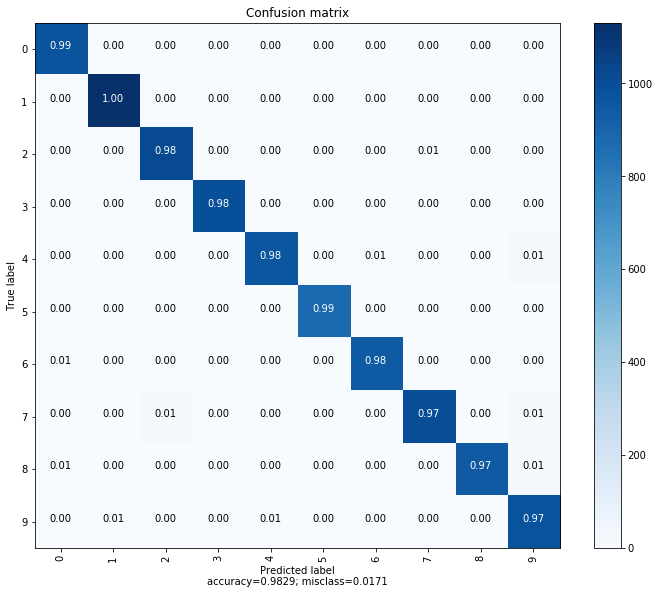

In [122]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true,y_pred,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          figsize=(10, 8),
                          digit_format='{:0.2f}',
                          save_as='auto'):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    cm = confusion_matrix( y_true,y_pred, normalize=None, labels=target_names)
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, digit_format.format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    #save_fig(save_as)
    plt.show()



plot_confusion_matrix(y_test, y_pred, range(10), normalize=True)